# Initial Questions

 Q1:To obtain a causal estimate of the treatment effectiveness, we can employ various analytical methods, such as regression analysis, propensity score matching, instrumental variable analysis, or randomized controlled trials (if feasible). Since this study is observational , the true casual effect cannot be studied easily and all the results will be biased.

Lets say if the study was randomized then we can account logistic regression to estimate the effect of using mosquito net on the risk of contracting dengue, but again the dependent variable (risk of contracting dengue) is not binary(range 0-100) , before applying logistic regression we have to transform it in binary variable using a threshold score or multi-category variable(muti-category logistic regression).

Again treatment variable is a count(net count) , we can use poisson or negative binomial regression if the count data is over dispersed.
Considering the give situation , we can use

Propensity Score Matching :  Propensity score matching helps balance the observed covariates between treated and untreated groups to reduce selection bias. You can estimate the propensity scores (the likelihood of receiving the treatment) using logistic regression and then match treated and untreated individuals based on these scores. After matching, we can compare the dengue risk between the matched groups to estimate the treatment effect.

Instrumental Variable Analysis: If there are concerns about endogeneity or unobserved confounders influencing both mosquito net usage and dengue risk, instrumental variable analysis can be used. An instrumental variable is a variable that affects the treatment variable but is not directly related to the outcome except through its effect on the treatment. This method requires identifying a valid instrumental variable, such as eligibility for the free net program, and using it to instrument for mosquito net usage.

We could aslo get more data for other counfounding factors such as environmental condition (geographical and weather condition) or municiple effectivness could also affect dengue_risk directly or indirectly.

Whether the analysis shows a cause-and-effect relationship depends on how well we assume things and how carefully we analyze the data. If our assumptions are correct and our analysis deals with problems like confounding factors and bias, then we can say for sure that the results show cause and effect.


Q2:Assumptions and considerations for each scenario:

Binary Treatment Variable (Use of Mosquito Net: Yes or No):

Assumption 1: Stable Treatment Assignment(SUTVA): Assume that households' decisions to use mosquito nets or not are stable and not influenced by unobserved factors that directly affect dengue risk,or the treatement of one individiuals , should'nt affect the other individuals

Assumption 2: No Omitted Variable Bias: Assume that all relevant variables influencing both mosquito net usage and dengue risk are included in the regression model, or that any omitted variables are uncorrelated with both the treatment and outcome variables.

Assumption 3: No Measurement Error: Assume that there is no significant measurement error in the binary treatment variable (e.g., misreporting of mosquito net usage).

Assumption 4: Independence of Errors: Assume that the errors in the regression model are independent and identically distributed (i.i.d.), meaning that there is no systematic bias in the residuals.

Consideration: If households self-select into using mosquito nets based on their perceived risk of dengue, propensity score matching or instrumental variable analysis may help address potential selection bias.

Count Treatment Variable (Number of Mosquito Nets Used):

Assumption 1: Linearity of Effect: Assume that the effect of each additional mosquito net on dengue risk is linear. This assumption may not hold if there are diminishing returns or threshold effects.

Assumption 2: No Zero-Inflation: Assume that households with zero mosquito nets do not represent a separate population with fundamentally different characteristics that would bias the analysis.

Assumption 3: Correct Model Specification: Assume that the chosen count data model (e.g., Poisson regression) is correctly specified and adequately captures the relationship between the count of mosquito nets and dengue risk.

In both scenarios, it's essential to acknowledge these assumptions and limitations when interpreting the results of the analysis. Sensitivity analyses and robustness checks can also be conducted to assess the robustness of the findings to different assumptions and model specifications.
Considering the DAG for both the scenarious would be different, and hence the counfounding variable and bias path could result into different reslts.

# Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
from matplotlib import pyplot as plt
import sklearn
%load_ext rpy2.ipython
from itertools import combinations
import plotnine as p


# Importing Data


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving ec402.csv to ec402 (1).csv


In [ ]:
uploaded

{'ec402 (1).csv': b'id,net,net_num,dengue_risk,income,health,household,eligible,temperature,resistance\r\n1,TRUE,1,33,781,56,2,FALSE,21.1,59\r\n2,FALSE,0,42,974,57,4,FALSE,26.5,73\r\n3,FALSE,0,80,502,15,3,FALSE,25.6,65\r\n4,TRUE,1,34,671,20,5,TRUE,21.3,46\r\n5,FALSE,0,44,728,17,5,FALSE,19.2,54\r\n6,FALSE,0,25,1050,48,1,FALSE,25.3,34\r\n7,TRUE,1,19,1146,65,3,FALSE,27.4,45\r\n8,FALSE,0,35,1093,75,5,FALSE,29.8,65\r\n9,FALSE,0,32,1037,60,3,FALSE,27.6,55\r\n10,FALSE,0,40,828,36,3,FALSE,21.3,54\r\n11,FALSE,0,30,889,75,6,FALSE,17.4,33\r\n12,TRUE,1,14,1133,62,3,FALSE,18.9,39\r\n13,TRUE,1,31,807,42,4,FALSE,27.6,37\r\n14,FALSE,0,34,950,53,3,FALSE,24,53\r\n15,FALSE,0,22,1195,90,1,FALSE,24.5,34\r\n16,TRUE,1,54,594,29,5,TRUE,25.5,55\r\n17,TRUE,1,23,936,47,2,FALSE,26.1,32\r\n18,FALSE,0,41,816,30,1,FALSE,17.7,73\r\n19,FALSE,0,37,962,55,2,FALSE,26.7,54\r\n20,TRUE,1,65,431,6,6,TRUE,26.8,38\r\n21,FALSE,0,59,760,36,5,FALSE,28.7,51\r\n22,FALSE,0,59,655,30,4,FALSE,23.6,43\r\n23,FALSE,0,41,896,45,3,FALSE,25

In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
df

,id,net,net_num,dengue_risk,income,health,household,eligible,temperature,resistance
0,1,True,1,33,781,56,2,False,21.1,59
1,2,False,0,42,974,57,4,False,26.5,73
2,3,False,0,80,502,15,3,False,25.6,65
3,4,True,1,34,671,20,5,True,21.3,46
4,5,False,0,44,728,17,5,False,19.2,54
...,...,...,...,...,...,...,...,...,...,...
1747,1748,True,1,18,961,27,4,False,22.1,27
1748,1749,False,0,49,906,49,5,False,30.7,55
1749,1750,False,0,17,1325,92,2,False,21.4,52
1750,1751,False,0,46,879,33,6,False,27.4,62


In [ ]:
# Checking for any null values in the column
df.isnull().sum()

id             0
net            0
net_num        0
dengue_risk    0
income         0
health         0
household      0
eligible       0
temperature    0
resistance     0
dtype: int64

In [ ]:
#Multiplying thr income column with 10 to get the exact figure of the income in a new column inr_income
df['inr_income'] = df['income'] * 10
df

,id,net,net_num,dengue_risk,income,health,household,eligible,temperature,resistance,inr_income
0,1,True,1,33,781,56,2,False,21.1,59,7810
1,2,False,0,42,974,57,4,False,26.5,73,9740
2,3,False,0,80,502,15,3,False,25.6,65,5020
3,4,True,1,34,671,20,5,True,21.3,46,6710
4,5,False,0,44,728,17,5,False,19.2,54,7280
...,...,...,...,...,...,...,...,...,...,...,...
1747,1748,True,1,18,961,27,4,False,22.1,27,9610
1748,1749,False,0,49,906,49,5,False,30.7,55,9060
1749,1750,False,0,17,1325,92,2,False,21.4,52,13250
1750,1751,False,0,46,879,33,6,False,27.4,62,8790


In [ ]:
# Correcting for eligiblilty criteria , which checks for both household > 4 and income < 7000
def eligb_chker():
    df['eligible']=(df['inr_income'] < 7000) &(df['household'] > 4)
    return df

In [ ]:
eligb_chker()

,id,net,net_num,dengue_risk,income,health,household,eligible,temperature,resistance,inr_income
0,1,True,1,33,781,56,2,False,21.1,59,7810
1,2,False,0,42,974,57,4,False,26.5,73,9740
2,3,False,0,80,502,15,3,False,25.6,65,5020
3,4,True,1,34,671,20,5,True,21.3,46,6710
4,5,False,0,44,728,17,5,False,19.2,54,7280
...,...,...,...,...,...,...,...,...,...,...,...
1747,1748,True,1,18,961,27,4,False,22.1,27,9610
1748,1749,False,0,49,906,49,5,False,30.7,55,9060
1749,1750,False,0,17,1325,92,2,False,21.4,52,13250
1750,1751,False,0,46,879,33,6,False,27.4,62,8790


In [ ]:
# Encoding the Categorical values into numerical using sckit-learn(note: padas was generating error) till here 2 columns 'net' and 'eligible' was encoded
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['eligible_encoded'] = label_encoder.fit_transform(df['eligible'])
df['net_encoded'] = label_encoder.fit_transform(df['net'])
df

,id,net,net_num,dengue_risk,income,health,household,eligible,temperature,resistance,inr_income,eligible_encoded,net_encoded
0,1,True,1,33,781,56,2,False,21.1,59,7810,0,1
1,2,False,0,42,974,57,4,False,26.5,73,9740,0,0
2,3,False,0,80,502,15,3,False,25.6,65,5020,0,0
3,4,True,1,34,671,20,5,True,21.3,46,6710,1,1
4,5,False,0,44,728,17,5,False,19.2,54,7280,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1748,True,1,18,961,27,4,False,22.1,27,9610,0,1
1748,1749,False,0,49,906,49,5,False,30.7,55,9060,0,0
1749,1750,False,0,17,1325,92,2,False,21.4,52,13250,0,0
1750,1751,False,0,46,879,33,6,False,27.4,62,8790,0,0


NAIVE MODEL

---


Building a naive model to test the baseline relationship between net-usage(net_encoded) and Dengu risk(dengue_risk)


In [ ]:
#Naive model using net usage
reg_nive_model = 'dengue_risk~net_encoded'
reg_nive_output= smf.ols(reg_nive_model,df).fit()
print(reg_nive_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     632.3
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          2.25e-119
Time:                        21:36:21   Log-Likelihood:                -7012.3
No. Observations:                1752   AIC:                         1.403e+04
Df Residuals:                    1750   BIC:                         1.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.9365      0.405    103.568      

Building a naive model to test relationship between Net Number(net_num) and Dengu risk(dengu_risk)

In [ ]:
#naive model using net number
reg_nive_model_net_num = 'dengue_risk~net_num'
reg_nive_net_num_output= smf.ols(reg_nive_model_net_num,df).fit()
print(reg_nive_net_num_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     632.3
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          2.25e-119
Time:                        21:36:21   Log-Likelihood:                -7012.3
No. Observations:                1752   AIC:                         1.403e+04
Df Residuals:                    1750   BIC:                         1.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.9365      0.405    103.568      0.0

# Drawing DAG using R

### Importing rpy2 package to run R codes in Python Environment

In [ ]:

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects import globalenv

### Installing necessary  R Packages

In [ ]:
utils = importr('utils')
utils.chooseCRANmirror(ind=1)
utils.install_packages('dagitty')
utils.install_packages('ggdag')
utils.install_packages("tidyverse")
utils.install_packages("MatchIt")
utils.install_packages("broom")
utils.install_packages('jtools')
utils.install_packages('huxtable')

In [ ]:
%%R
library(tidyverse)
library(ggdag)
library(broom)
library(MatchIt)
library(dagitty)

### DAG Diagram

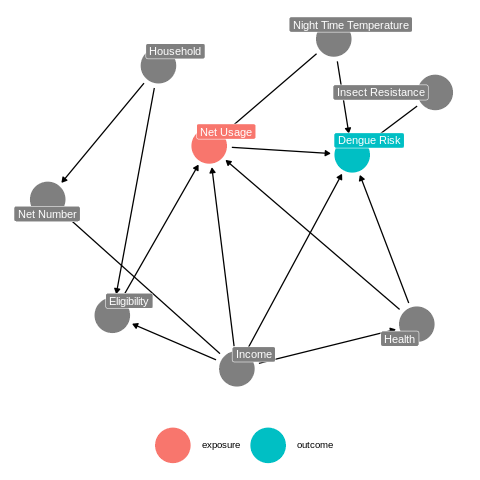

In [ ]:
%%R
set.seed(1234)
library(ggdag)

mosquito_dag <- dagify(
  dengue_risk ~ net_usage + income + health + insect_resistance + night_time_temp,
  net_usage ~ income + eligibility + health + night_time_temp,
  health ~ income,
  net_num ~ income + household ,
  eligibility ~ income + household,
  exposure = "net_usage",
  outcome = "dengue_risk",
  coords = list(
    x = c(dengue_risk = 5.2, eligibility = 0, net_usage = 2.1, income = 2.7,
          health = 6.6, insect_resistance = 7, night_time_temp = 4.8, net_num = -1.4, household = 1 ),
    y = c(dengue_risk = 3.5, net_usage = 3.6, income = 1.1,health = 1.6, eligibility = 1.7,
          insect_resistance = 4.2, night_time_temp = 4.8, net_num = 3,household = 4.5)),
  labels = c(dengue_risk = "Dengue Risk", net_num = "Net Number", net_usage = "Net Usage",
             income = "Income", health = "Health", insect_resistance = "Insect Resistance",
             night_time_temp = "Night Time Temperature", eligibility = "Eligibility", household = "Household")
)

ggdag_status(mosquito_dag, use_labels = "label", text = FALSE, seed = 1234) +
  guides(color = guide_legend(title = NULL)) +
  theme_dag() +
  theme(legend.position = "bottom")


In [ ]:
%%R
##Finding all the testable implications from the DAG
impd_cond <-impliedConditionalIndependencies(mosquito_dag)
impd_cond

dng_ _||_ elgb | hlth, incm, nt_s, ng__
dng_ _||_ hshl | elgb, incm
dng_ _||_ hshl | hlth, incm, nt_s, ng__
dng_ _||_ nt_n | hshl, incm
dng_ _||_ nt_n | elgb, incm
dng_ _||_ nt_n | hlth, incm, nt_s, ng__
elgb _||_ hlth | incm
elgb _||_ ins_
elgb _||_ nt_n | hshl, incm
elgb _||_ ng__
hlth _||_ hshl
hlth _||_ ins_
hlth _||_ nt_n | incm
hlth _||_ ng__
hshl _||_ incm
hshl _||_ ins_
hshl _||_ nt_s | elgb, incm
hshl _||_ ng__
incm _||_ ins_
incm _||_ ng__
ins_ _||_ nt_n
ins_ _||_ nt_s
ins_ _||_ ng__
nt_n _||_ nt_s | elgb, incm
nt_n _||_ nt_s | hshl, incm
nt_n _||_ ng__


In [ ]:
%%R
## Finding all the paths between teatement and outcome
paths(mosquito_dag)

$paths
 [1] "net_usage -> dengue_risk"                                                           
 [2] "net_usage <- eligibility <- household -> net_num <- income -> dengue_risk"          
 [3] "net_usage <- eligibility <- household -> net_num <- income -> health -> dengue_risk"
 [4] "net_usage <- eligibility <- income -> dengue_risk"                                  
 [5] "net_usage <- eligibility <- income -> health -> dengue_risk"                        
 [6] "net_usage <- health -> dengue_risk"                                                 
 [7] "net_usage <- health <- income -> dengue_risk"                                       
 [8] "net_usage <- income -> dengue_risk"                                                 
 [9] "net_usage <- income -> health -> dengue_risk"                                       
[10] "net_usage <- night_time_temp -> dengue_risk"                                        

$open
 [1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE



Minimum Sufficient Adjustment Set

In [ ]:
%%R
##Finding the minimum adjustment set
adjustmentSets(mosquito_dag)

{ health, income, night_time_temp }


Visualizing Ajustment Set

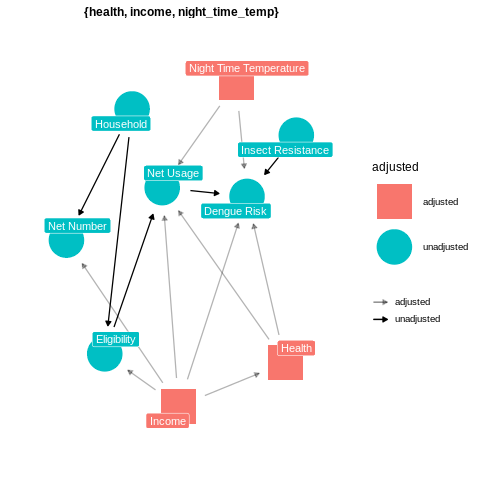

In [ ]:
%%R
##Visualizing Adjustment set
ggdag_adjustment_set(mosquito_dag, shadow = TRUE,use_labels = 'label', text = FALSE)+
theme_dag()

Here we see that the counfounders are : Night_Time_Temperature , Health,Income which we need to control while  calculating the impact of net usage on dengue risk

# Multiple Regression

Using Multiple Regression to close the backdoor.

<- Controlling for all covariates

In [ ]:
reg_controll_all_cov ='dengue_risk~net_encoded+health+temperature+inr_income+resistance+household'
reg_controll_all_cov_output = smf.ols(reg_controll_all_cov,df).fit()
print(reg_controll_all_cov_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3517.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:55:46   Log-Likelihood:                -5029.3
No. Observations:                1752   AIC:                         1.007e+04
Df Residuals:                    1745   BIC:                         1.011e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      65.7150      0.864     76.091      

<- controlling for all counfounders : health + temperature + income

In [ ]:
reg_controll_all_counf ='dengue_risk~net_encoded+health+temperature+inr_income'
reg_controll_all_counf_output = smf.ols(reg_controll_all_counf,df).fit()
print(reg_controll_all_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     3366.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:38:55   Log-Likelihood:                -5386.7
No. Observations:                1752   AIC:                         1.078e+04
Df Residuals:                    1747   BIC:                         1.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      76.1599      0.927     82.172      

<- controlling for all counfounders + household

In [ ]:
reg_controll_all2_counf ='dengue_risk~net_encoded+health+temperature+inr_income+household'
reg_controll_all2_counf_output= smf.ols(reg_controll_all2_counf,df).fit()
print(reg_controll_all2_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:38:55   Log-Likelihood:                -5386.7
No. Observations:                1752   AIC:                         1.079e+04
Df Residuals:                    1746   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      76.2067      0.966     78.906      

<- controlling or only income

In [ ]:
reg_controll_inr_incom_counf ='dengue_risk~net_encoded+inr_income'
reg_controll_inr_incom_counf_output = smf.ols(reg_controll_inr_incom_counf,df).fit()
print(reg_controll_inr_incom_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3487.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:38:55   Log-Likelihood:                -5874.8
No. Observations:                1752   AIC:                         1.176e+04
Df Residuals:                    1749   BIC:                         1.177e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.3943      0.811    117.592      

<- controlling for only health

In [ ]:
reg_controll_health_counf ='dengue_risk~net_encoded+health'
reg_controll_health_counf_output = smf.ols(reg_controll_health_counf,df).fit()
print(reg_controll_health_counf_output.summary())


                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     819.1
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          9.44e-252
Time:                        21:51:15   Log-Likelihood:                -6703.5
No. Observations:                1752   AIC:                         1.341e+04
Df Residuals:                    1749   BIC:                         1.343e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      61.3193      0.790     77.651      

<- controlling for only temperature

In [ ]:
reg_controll_temperature_counf ='dengue_risk~net_encoded+temperature'
reg_controll_temperature_counf_output = smf.ols(reg_controll_temperature_counf,df).fit()
print(reg_controll_temperature_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     363.6
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          8.87e-133
Time:                        21:38:55   Log-Likelihood:                -6978.0
No. Observations:                1752   AIC:                         1.396e+04
Df Residuals:                    1749   BIC:                         1.398e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.6420      1.871     14.241      

<- controlling for income and health

In [ ]:
reg_controll_inr_incom_health_counf ='dengue_risk~net_encoded+inr_income+health'
reg_controll_inr_incom_health_counf_output = smf.ols(reg_controll_inr_incom_health_counf,df).fit()
print(reg_controll_inr_incom_health_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2580.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:38:55   Log-Likelihood:                -5800.8
No. Observations:                1752   AIC:                         1.161e+04
Df Residuals:                    1748   BIC:                         1.163e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      98.0388      0.807    121.546      

<-controlling for income and temperature

In [ ]:
reg_controll_inr_incom_temp_counf ='dengue_risk~net_encoded+inr_income+temperature'
reg_controll_inr_incom_temp_counf_output = smf.ols(reg_controll_inr_incom_temp_counf,df).fit()
print(reg_controll_inr_incom_temp_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3985.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:38:55   Log-Likelihood:                -5478.6
No. Observations:                1752   AIC:                         1.097e+04
Df Residuals:                    1748   BIC:                         1.099e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      73.3096      0.952     76.979      

<- controlling for temperature and health

In [ ]:
reg_controll_temperature_health_counf ='dengue_risk~net_encoded+temperature+health'
reg_controll_temperature_health_counf_output = smf.ols(reg_controll_temperature_health_counf,df).fit()
print(reg_controll_temperature_health_counf_output.summary())

                            OLS Regression Results                            
Dep. Variable:            dengue_risk   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     680.8
Date:                Sun, 31 Mar 2024   Prob (F-statistic):          3.92e-293
Time:                        21:38:55   Log-Likelihood:                -6604.5
No. Observations:                1752   AIC:                         1.322e+04
Df Residuals:                    1748   BIC:                         1.324e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.0997      1.585     25.936      

We controlled every combinations of confounders to , get the best estimate

Summary

In [ ]:
stargazer = Stargazer([reg_controll_all_cov_output,reg_controll_all_counf_output,reg_controll_all2_counf_output,
                       reg_controll_inr_incom_counf_output,reg_controll_health_counf_output,reg_controll_temperature_counf_output,
                       reg_controll_inr_incom_health_counf_output,reg_controll_inr_incom_temp_counf_output,reg_controll_temperature_health_counf_output
                       ])
stargazer

# Convering Python Dataframe to R Dataframe

In [ ]:
# Convert the python dataframe to the R dataframe
with localconverter(ro.default_converter + pandas2ri.converter):
  dfr = ro.conversion.py2rpy(df)
# Check the type of the convertion output
type(dfr)

/usr/local/lib/python3.10/dist-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


rpy2.robjects.vectors.DataFrame

In [ ]:
# Create a variable name in R's global environment
globalenv['dfr'] = dfr
# Print statistics
%R print(summary(dfr))

       id            net             net_num        dengue_risk   
 Min.   :   1.0   Mode :logical   Min.   :0.0000   Min.   :10.00  
 1st Qu.: 438.8   FALSE:1071      1st Qu.:0.0000   1st Qu.:24.00  
 Median : 876.5   TRUE :681       Median :0.0000   Median :31.00  
 Mean   : 876.5                   Mean   :0.3887   Mean   :35.59  
 3rd Qu.:1314.2                   3rd Qu.:1.0000   3rd Qu.:46.00  
 Max.   :1752.0                   Max.   :1.0000   Max.   :90.00  
     income           health         household      eligible      
 Min.   : 301.0   Min.   :  5.00   Min.   :1.000   Mode :logical  
 1st Qu.: 779.0   1st Qu.: 38.00   1st Qu.:2.000   FALSE:1713     
 Median : 904.5   Median : 51.00   Median :3.000   TRUE :39       
 Mean   : 904.8   Mean   : 50.72   Mean   :2.989                  
 3rd Qu.:1036.0   3rd Qu.: 63.00   3rd Qu.:4.000                  
 Max.   :1469.0   Max.   :100.00   Max.   :9.000                  
  temperature      resistance      inr_income    eligible_enco

'Min. :...,'1st Qu.:...,'Median :...,...,'Mean :...,'3rd Qu.:...,'Max. :...


# Matching

**Exact Matching**

In [ ]:
%%R
matching_data_exact <- matchit(net_encoded ~ inr_income + health + temperature+resistance, data = dfr,method = "exact")
print(summary(matching_data_exact))

Error in `matchit()`:
! No exact matches were found.
Backtrace:
 1. base (local) `<fn>`(`<expression>`)
 4. MatchIt::matchit(...)
 6. MatchIt:::matchit2exact(...)
 7. MatchIt:::.err("No exact matches were found")
 8. chk::err(..., call = pkg_caller_call(start = 2))



Error in matchit(net_encoded ~ inr_income + health + temperature + resistance,  :


**Approximate Matching**

 Nearest-neighbour Matching


In [ ]:
%%R
library(MatchIt)
matching_nnm_data <- matchit(net_encoded ~ inr_income + health + temperature, data = dfr,
                         method = "nearest",
                         distance = "mahalanobis",
                         replace = TRUE)
print(summary(matching_nnm_data))


Call:
matchit(formula = net_encoded ~ inr_income + health + temperature, 
    data = dfr, method = "nearest", distance = "mahalanobis", 
    replace = TRUE)

Summary of Balance for All Data:
            Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
inr_income      9551.9383      8727.526          0.4089     1.3633    0.1044
health            54.9090        48.057          0.3619     1.2083    0.0714
temperature       23.3809        24.088         -0.1685     1.0846    0.0424
            eCDF Max
inr_income    0.1983
health        0.1683
temperature   0.0972

Summary of Balance for Matched Data:
            Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
inr_income      9551.9383     9501.8355          0.0248     1.1061    0.0093
health            54.9090       54.5433          0.0193     1.0714    0.0073
temperature       23.3809       23.4066         -0.0061     1.0335    0.0067
            eCDF Max Std. Pair Dist.
inr_income    0.0485          0.1

In [ ]:
%%R
nnm_matched_data <- match.data(matching_nnm_data)
summary(nnm_matched_data)

       id            net             net_num        dengue_risk   
 Min.   :   1.0   Mode :logical   Min.   :0.0000   Min.   :10.00  
 1st Qu.: 444.0   FALSE:436       1st Qu.:0.0000   1st Qu.:21.00  
 Median : 879.0   TRUE :681       Median :1.0000   Median :27.00  
 Mean   : 875.8                   Mean   :0.6097   Mean   :30.57  
 3rd Qu.:1304.0                   3rd Qu.:1.0000   3rd Qu.:37.00  
 Max.   :1752.0                   Max.   :1.0000   Max.   :86.00  
     income           health         household      eligible      
 Min.   : 301.0   Min.   :  5.00   Min.   :1.000   Mode :logical  
 1st Qu.: 808.0   1st Qu.: 41.00   1st Qu.:2.000   FALSE:1080     
 Median : 948.0   Median : 54.00   Median :3.000   TRUE :37       
 Mean   : 939.7   Mean   : 53.61   Mean   :3.062                  
 3rd Qu.:1075.0   3rd Qu.: 67.00   3rd Qu.:4.000                  
 Max.   :1469.0   Max.   :100.00   Max.   :9.000                  
  temperature      resistance      inr_income    eligible_enco

Estimating for nnm

In [ ]:
%%R
nnm_model_matched <- lm(dengue_risk ~ net_encoded,
                    data = nnm_matched_data)
tidy(nnm_model_matched)

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)     38.3     0.599      64.0 0       
2 net_encoded    -12.7     0.768     -16.6 2.28e-55


In [ ]:
%%R
#nnm weighted
nnm_model_matched_weight <- lm(dengue_risk ~ net_encoded, data = nnm_matched_data,weights = weights)
tidy(nnm_model_matched_weight)

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)     36.1     0.597      60.4 0       
2 net_encoded    -10.5     0.765     -13.7 1.17e-39


Coarsened Matching

In [ ]:
%%R
# Coarsened exact matching
coarsened_exact_match <- matchit(net_encoded ~ inr_income + health + temperature, data=dfr, method="cem",distance="logit")
m_coarsened_match_data <- match.data(coarsened_exact_match)

# Summary of coarsened exact matching
summary(coarsened_exact_match, un = FALSE)



Call:
matchit(formula = net_encoded ~ inr_income + health + temperature, 
    data = dfr, method = "cem", distance = "logit")

Summary of Balance for Matched Data:
            Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
inr_income      9240.7186     9205.3177          0.0176     1.0285    0.0073
health            52.0679       52.1209         -0.0028     0.9846    0.0042
temperature       23.5261       23.5379         -0.0028     0.9914    0.0055
            eCDF Max Std. Pair Dist.
inr_income    0.0365          0.1560
health        0.0208          0.1372
temperature   0.0222          0.1123

Sample Sizes:
              Control Treated
All           1071.       681
Matched (ESS)  385.68     501
Matched        714.       501
Unmatched      357.       180
Discarded        0.         0



Estimation oF Coarsed Matching

In [ ]:
%%R
lm_out_coarsened <- lm(dengue_risk ~ net_encoded,
                       data = m_coarsened_match_data )
summary(lm_out_coarsened)


Call:
lm(formula = dengue_risk ~ net_encoded, data = m_coarsened_match_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.175  -8.299  -2.175   6.701  41.825 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.1751     0.4234   92.51   <2e-16 ***
net_encoded -12.8757     0.6594  -19.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.31 on 1213 degrees of freedom
Multiple R-squared:  0.2391,	Adjusted R-squared:  0.2385 
F-statistic: 381.2 on 1 and 1213 DF,  p-value: < 2.2e-16



In [ ]:
%%R
#weighted coarsened estimation
lm_out_coarsened_weight <- lm(dengue_risk ~ net_encoded,
                       data = m_coarsened_match_data , weights = weights)
summary(lm_out_coarsened_weight)


Call:
lm(formula = dengue_risk ~ net_encoded, data = m_coarsened_match_data, 
    weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-38.725  -6.869  -1.299   5.810  77.580 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.5071     0.4369   85.85   <2e-16 ***
net_encoded -11.2077     0.6804  -16.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.67 on 1213 degrees of freedom
Multiple R-squared:  0.1828,	Adjusted R-squared:  0.1821 
F-statistic: 271.3 on 1 and 1213 DF,  p-value: < 2.2e-16



### Balance Test

In [ ]:
%%R
##t.test(dfr$net_num ~ dfr$net)
t.test(dfr$income ~ dfr$net_encoded)

##t.test(dfr$health ~ dfr$net)

##t.test(dfr$household ~ dfr$net)
##t.test(dfr$eligible ~ dfr$net)
##t.test(dfr$temperature ~ dfr$net)
##t.test(dfr$resistance ~ dfr$net)


	Welch Two Sample t-test

data:  dfr$income by dfr$net_encoded
t = -8.8113, df = 1284.7, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -100.79660  -64.08593
sample estimates:
mean in group 0 mean in group 1 
       872.7526        955.1938 



In [ ]:
%%R
t.test(dfr$health ~ dfr$net)


	Welch Two Sample t-test

data:  dfr$health by dfr$net
t = -7.6447, df = 1346.9, p-value = 3.961e-14
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -8.610309 -5.093693
sample estimates:
mean in group FALSE  mean in group TRUE 
           48.05696            54.90896 



In [ ]:

%%R
t.test(dfr$household ~ dfr$net)


	Welch Two Sample t-test

data:  dfr$household by dfr$net
t = -4.4332, df = 1345.1, p-value = 1.004e-05
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -0.4496807 -0.1737886
sample estimates:
mean in group FALSE  mean in group TRUE 
           2.867414            3.179148 



In [ ]:
%%R
t.test(dfr$eligible ~ dfr$net)



	Welch Two Sample t-test

data:  dfr$eligible by dfr$net
t = -5.7334, df = 728.49, p-value = 1.442e-08
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -0.06720447 -0.03292017
sample estimates:
mean in group FALSE  mean in group TRUE 
         0.00280112          0.05286344 



In [ ]:
%%R
t.test(dfr$temperature ~ dfr$net)


	Welch Two Sample t-test

data:  dfr$temperature by dfr$net
t = 3.492, df = 1404.3, p-value = 0.0004943
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 0.3098586 1.1042309
sample estimates:
mean in group FALSE  mean in group TRUE 
           24.08796            23.38091 



In [ ]:
%%R
t.test(dfr$resistance ~ dfr$net)


	Welch Two Sample t-test

data:  dfr$resistance by dfr$net
t = -0.71352, df = 1526.4, p-value = 0.4756
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -1.7870188  0.8337083
sample estimates:
mean in group FALSE  mean in group TRUE 
           47.60411            48.08076 



## Generating Propensity Score

In [ ]:
%%R
model_glm <- glm(net_encoded ~ inr_income + health + temperature, data = dfr, family = binomial(link = "logit"))
tidy(model_glm)

# A tibble: 4 × 5
  term         estimate std.error statistic     p.value
  <chr>           <dbl>     <dbl>     <dbl>       <dbl>
1 (Intercept) -1.32     0.376         -3.50 0.000464   
2 inr_income   0.000209 0.0000421      4.95 0.000000727
3 health       0.00688  0.00430        1.60 0.109      
4 temperature -0.0589   0.0125        -4.70 0.00000264 


In [ ]:
%%R
net_prob <- augment_columns(model_glm,dfr,type.predict = "response") %>%
  # The predictions are in a column named ".fitted", so we rename it here
  rename(p_score = .fitted)
#lookup
net_prob %>%
  select(id, net, income, temperature, health, p_score) %>%
  head()

# A tibble: 6 × 6
     id net   income temperature health p_score
  <int> <lgl>  <int>       <dbl>  <int>   <dbl>
1     1 TRUE     781        21.1     56   0.367
2     2 FALSE    974        26.5     57   0.389
3     3 FALSE    502        25.6     15   0.158
4     4 TRUE     671        21.3     20   0.263
5     5 FALSE    728        19.2     17   0.308
6     6 FALSE   1050        25.3     48   0.429


Genearating Pscore Matched Visuals

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


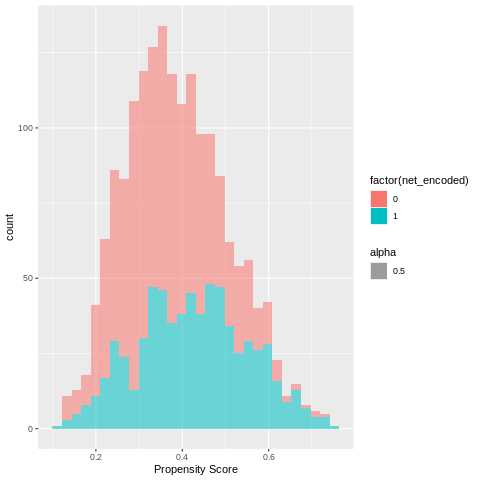

In [ ]:
%%R
pscore_histogram <-ggplot(net_prob,aes(p_score)) + geom_histogram(aes(fill=factor(net_encoded),alpha = 0.5))+xlab("Propensity Score")
pscore_histogram

Here we can see there is very strong overlap between the treated and controlled

## Generating IPW Score

In [ ]:
%%R
net_ipw <- net_prob %>%
  mutate(ipw = (net_num / p_score) + ((1 - net_num) / (1 - p_score)))

net_ipw %>%
  select(id, net, income, temperature, health, p_score, ipw) %>%
  head()

# A tibble: 6 × 7
     id net   income temperature health p_score   ipw
  <int> <lgl>  <int>       <dbl>  <int>   <dbl> <dbl>
1     1 TRUE     781        21.1     56   0.367  2.72
2     2 FALSE    974        26.5     57   0.389  1.64
3     3 FALSE    502        25.6     15   0.158  1.19
4     4 TRUE     671        21.3     20   0.263  3.81
5     5 FALSE    728        19.2     17   0.308  1.44
6     6 FALSE   1050        25.3     48   0.429  1.75


In [ ]:
%%R
model_ipw <- lm(dengue_risk ~ net_encoded,
                data = net_ipw)

tidy(model_ipw)

# A tibble: 2 × 5
  term        estimate std.error statistic   p.value
  <chr>          <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)     41.9     0.405     104.  0        
2 net_encoded    -16.3     0.649     -25.1 2.25e-119


In [ ]:
%%R
model_ipw_weight <- lm(dengue_risk ~ net_encoded,
                data = net_ipw,
                weights = ipw)

tidy(model_ipw_weight)

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)     39.7     0.468      84.7 0       
2 net_encoded    -10.1     0.658     -15.4 3.21e-50


In [ ]:
%%R
naive_model <- lm(dengue_risk ~ net_encoded, data = dfr)
tidy(naive_model)

# A tibble: 2 × 5
  term        estimate std.error statistic   p.value
  <chr>          <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)     41.9     0.405     104.  0        
2 net_encoded    -16.3     0.649     -25.1 2.25e-119


# Model Summary

In [ ]:
%%R
model_list <- list( "NAIVE" = naive_model,"NNM" = nnm_model_matched,"NNM+weight" = nnm_model_matched_weight,"Coarsened" = lm_out_coarsened,
                   "Coarsened + Weight" =lm_out_coarsened_weight,
                   "IPW" = model_ipw_weight )

In [ ]:
%%R
library(jtools)
export_summs(model_list,scale = TRUE)

 ──────────────────────────────────────────────────────────────────────────────
               NAIVE       NNM      NNM+weig   Coarsene   Coarsene     IPW     
                                       ht         d         d +                
                                                           Weight              
            ───────────────────────────────────────────────────────────────────
   (Interce      41.94      38.33      36.09      39.18      37.51      39.68  
   pt)             ***        ***        ***        ***        ***        ***  
              (0.40)     (0.60)     (0.60)     (0.42)     (0.44)     (0.47)    
                                                                               
   net_enco     -16.33     -12.73     -10.48     -12.88     -11.21     -10.13  
   ded             ***        ***        ***        ***        ***        ***  
              (0.65)     (0.77)     (0.76)     (0.66)     (0.68)     (0.66)    
                                        

#Question4

Q4:Whether the analysis shows a causual relationship depends on how well we assume things and how carefully we analyze the data.Increasing more knowledge about the area of study will also help to model and estimate the true casual effect of the treatement.  If our assumptions are correct and our analysis deals with problems like counfounding factors,unobserved counfoundersand bias, then we can say for sure that the results show cause and effect.

Well if we the the modal summary the ipw matching generate the most nearest estimate to -10.13 and the second nearest estimate is obtained from nearest neighbour matching of -10.48 in our study . We omitted truncated ipw matching  for our data as all IPWs are below 10 so we dosen't need to worry about truncation.

#Question5

Q5:BONUS QUESTION
If the the question is changed to evaluation of the mosquito net
programme by government ,the analytical approach and assumptions may need to be adjusted accordingly.Accounting  our data , while considering the effectivness of the government program , the question changes slightly but the core question of assessing the effectiveness of mosquito nets on dengue risk persists, the evaluation of the government program expands the scope to consider factors such as program implementation, coverage, and community-wide effects,health-care facilities,geographical location,climatic condition

Since participation in the program is not randomly assigned (it depends on specific household criteria), establishing causality becomes more challenging.
We may still use regression analysis to examine the association between program participation and dengue risk, but it's crucial to address potential confounding factors and selection bias.

We could also employ DID(Difference-in-difference) analysis and compare the  changes in dengue risk before and after the implementation of the mosquito net program in areas that received the intervention versus those that did not.